In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import glob
import os
import scipy.io
from scipy import signal
from scipy import ndimage
import math
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

Using TensorFlow backend.


In [0]:
import pickle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils

## Load DataSet

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
train_set_X = train_features
train_set_Y = train_labels
test_set_X = test_features
test_set_Y = test_labels

In [6]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [7]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [8]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Own Network Architecture

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_1'))

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_2'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_3'))

model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_4'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_5'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, activation = 'relu', name='dense_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv_layer_3 (Conv2D)        (None, 12, 12, 64)        18496     
_________________________________________________________________
conv_layer_4 (Conv2D)        (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pool_layer_2 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv_layer_5 (Conv2D)        (None, 3, 3, 128)         73856     
__________

## Training Model

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

In [12]:
history_1 = model.fit(train_set_X, encoded_train_Y,
          batch_size = 100,
          epochs = 100,
          validation_data = (test_set_X, encoded_test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 23s 470us/step - loss: 1.9714 - acc: 0.2866 - val_loss: 1.7907 - val_acc: 0.3528
Epoch 2/100
 7000/50000 [===>..........................] - ETA: 16s - loss: 1.8084 - acc: 0.3497

50000/50000 [==============================] - 21s 416us/step - loss: 1.7394 - acc: 0.3720 - val_loss: 1.6808 - val_acc: 0.3958
Epoch 3/100
50000/50000 [==============================] - 21s 418us/step - loss: 1.6276 - acc: 0.4128 - val_loss: 1.5972 - val_acc: 0.4286
Epoch 4/100
12400/50000 [======>.......................] - ETA: 14s - loss: 1.5647 - acc: 0.4326

50000/50000 [==============================] - 21s 425us/step - loss: 1.5485 - acc: 0.4397 - val_loss: 1.5152 - val_acc: 0.4552
Epoch 5/100
50000/50000 [==============================] - 21s 419us/step - loss: 1.4916 - acc: 0.4648 - val_loss: 1.4661 - val_acc: 0.4762
Epoch 6/100
13800/50000 [=======>......................] - ETA: 14s - loss: 1.4496 - acc: 0.4802

50000/50000 [==============================] - 21s 416us/step - loss: 1.4432 - acc: 0.4857 - val_loss: 1.4798 - val_acc: 0.4665
Epoch 7/100
50000/50000 [==============================] - 21s 422us/step - loss: 1.3963 - acc: 0.5001 - val_loss: 1.4056 - val_acc: 0.4914
Epoch 8/100
14800/50000 [=======>......................] - ETA: 13s - loss: 1.3618 - acc: 0.5180

50000/50000 [==============================] - 21s 417us/step - loss: 1.3674 - acc: 0.5151 - val_loss: 1.3829 - val_acc: 0.5069
Epoch 9/100
50000/50000 [==============================] - 21s 421us/step - loss: 1.3257 - acc: 0.5280 - val_loss: 1.3846 - val_acc: 0.5031
Epoch 10/100
14300/50000 [=======>......................] - ETA: 14s - loss: 1.2935 - acc: 0.5427

50000/50000 [==============================] - 21s 416us/step - loss: 1.2962 - acc: 0.5400 - val_loss: 1.3245 - val_acc: 0.5226
Epoch 11/100
50000/50000 [==============================] - 21s 413us/step - loss: 1.2685 - acc: 0.5503 - val_loss: 1.3182 - val_acc: 0.5376
Epoch 12/100
14500/50000 [=======>......................] - ETA: 14s - loss: 1.2410 - acc: 0.5609

50000/50000 [==============================] - 21s 417us/step - loss: 1.2388 - acc: 0.5616 - val_loss: 1.2864 - val_acc: 0.5366
Epoch 13/100
50000/50000 [==============================] - 21s 423us/step - loss: 1.2175 - acc: 0.5707 - val_loss: 1.2633 - val_acc: 0.5508
Epoch 14/100
13900/50000 [=======>......................] - ETA: 14s - loss: 1.2128 - acc: 0.5734

50000/50000 [==============================] - 21s 420us/step - loss: 1.1959 - acc: 0.5789 - val_loss: 1.2650 - val_acc: 0.5465
Epoch 15/100
50000/50000 [==============================] - 21s 418us/step - loss: 1.1719 - acc: 0.5870 - val_loss: 1.2482 - val_acc: 0.5549
Epoch 16/100
14400/50000 [=======>......................] - ETA: 14s - loss: 1.1475 - acc: 0.6011

50000/50000 [==============================] - 21s 423us/step - loss: 1.1547 - acc: 0.5945 - val_loss: 1.2465 - val_acc: 0.5590
Epoch 17/100
50000/50000 [==============================] - 21s 420us/step - loss: 1.1387 - acc: 0.5985 - val_loss: 1.2465 - val_acc: 0.5595
Epoch 18/100
14800/50000 [=======>......................] - ETA: 13s - loss: 1.0955 - acc: 0.6165

50000/50000 [==============================] - 21s 419us/step - loss: 1.1162 - acc: 0.6083 - val_loss: 1.2226 - val_acc: 0.5668
Epoch 19/100
50000/50000 [==============================] - 21s 422us/step - loss: 1.0983 - acc: 0.6155 - val_loss: 1.2233 - val_acc: 0.5695
Epoch 20/100
14500/50000 [=======>......................] - ETA: 13s - loss: 1.0912 - acc: 0.6184

50000/50000 [==============================] - 21s 413us/step - loss: 1.0863 - acc: 0.6194 - val_loss: 1.1784 - val_acc: 0.5818
Epoch 21/100
50000/50000 [==============================] - 21s 419us/step - loss: 1.0669 - acc: 0.6273 - val_loss: 1.2039 - val_acc: 0.5802
Epoch 22/100
14400/50000 [=======>......................] - ETA: 13s - loss: 1.0496 - acc: 0.6321

50000/50000 [==============================] - 21s 417us/step - loss: 1.0486 - acc: 0.6314 - val_loss: 1.1818 - val_acc: 0.5850
Epoch 23/100
50000/50000 [==============================] - 21s 417us/step - loss: 1.0339 - acc: 0.6375 - val_loss: 1.2267 - val_acc: 0.5718
Epoch 24/100
14900/50000 [=======>......................] - ETA: 13s - loss: 1.0203 - acc: 0.6398

50000/50000 [==============================] - 21s 414us/step - loss: 1.0220 - acc: 0.6423 - val_loss: 1.1533 - val_acc: 0.5946
Epoch 25/100
50000/50000 [==============================] - 21s 413us/step - loss: 1.0064 - acc: 0.6479 - val_loss: 1.1460 - val_acc: 0.5956
Epoch 26/100
14700/50000 [=======>......................] - ETA: 13s - loss: 0.9901 - acc: 0.6531

50000/50000 [==============================] - 21s 414us/step - loss: 0.9945 - acc: 0.6520 - val_loss: 1.1619 - val_acc: 0.5935
Epoch 27/100
50000/50000 [==============================] - 21s 415us/step - loss: 0.9809 - acc: 0.6576 - val_loss: 1.1661 - val_acc: 0.6025
Epoch 28/100
14400/50000 [=======>......................] - ETA: 13s - loss: 0.9626 - acc: 0.6639

50000/50000 [==============================] - 21s 412us/step - loss: 0.9687 - acc: 0.6621 - val_loss: 1.1274 - val_acc: 0.6061
Epoch 29/100
50000/50000 [==============================] - 21s 414us/step - loss: 0.9526 - acc: 0.6673 - val_loss: 1.1340 - val_acc: 0.6070
Epoch 30/100
14800/50000 [=======>......................] - ETA: 13s - loss: 0.9377 - acc: 0.6756

50000/50000 [==============================] - 21s 416us/step - loss: 0.9451 - acc: 0.6716 - val_loss: 1.1742 - val_acc: 0.5911
Epoch 31/100
50000/50000 [==============================] - 21s 412us/step - loss: 0.9342 - acc: 0.6730 - val_loss: 1.1245 - val_acc: 0.6090
Epoch 32/100
15000/50000 [========>.....................] - ETA: 13s - loss: 0.9072 - acc: 0.6815

50000/50000 [==============================] - 21s 414us/step - loss: 0.9187 - acc: 0.6775 - val_loss: 1.1199 - val_acc: 0.6158
Epoch 33/100
50000/50000 [==============================] - 21s 420us/step - loss: 0.9092 - acc: 0.6839 - val_loss: 1.1176 - val_acc: 0.6162
Epoch 34/100
14200/50000 [=======>......................] - ETA: 14s - loss: 0.8956 - acc: 0.6894

50000/50000 [==============================] - 21s 417us/step - loss: 0.8983 - acc: 0.6872 - val_loss: 1.1003 - val_acc: 0.6221
Epoch 35/100
50000/50000 [==============================] - 21s 411us/step - loss: 0.8877 - acc: 0.6894 - val_loss: 1.1374 - val_acc: 0.6107
Epoch 36/100
14500/50000 [=======>......................] - ETA: 13s - loss: 0.8595 - acc: 0.6983

50000/50000 [==============================] - 21s 413us/step - loss: 0.8742 - acc: 0.6943 - val_loss: 1.1739 - val_acc: 0.6043
Epoch 37/100
50000/50000 [==============================] - 21s 416us/step - loss: 0.8649 - acc: 0.7007 - val_loss: 1.1348 - val_acc: 0.6198
Epoch 38/100
14400/50000 [=======>......................] - ETA: 13s - loss: 0.8454 - acc: 0.7059

50000/50000 [==============================] - 21s 412us/step - loss: 0.8542 - acc: 0.7011 - val_loss: 1.1128 - val_acc: 0.6232
Epoch 39/100
50000/50000 [==============================] - 21s 417us/step - loss: 0.8421 - acc: 0.7074 - val_loss: 1.0958 - val_acc: 0.6312
Epoch 40/100
14700/50000 [=======>......................] - ETA: 13s - loss: 0.8221 - acc: 0.7183

50000/50000 [==============================] - 21s 415us/step - loss: 0.8319 - acc: 0.7121 - val_loss: 1.1066 - val_acc: 0.6237
Epoch 41/100
50000/50000 [==============================] - 21s 418us/step - loss: 0.8248 - acc: 0.7129 - val_loss: 1.1007 - val_acc: 0.6305
Epoch 42/100
13800/50000 [=======>......................] - ETA: 14s - loss: 0.8285 - acc: 0.7114

50000/50000 [==============================] - 21s 420us/step - loss: 0.8161 - acc: 0.7159 - val_loss: 1.0993 - val_acc: 0.6279
Epoch 43/100
50000/50000 [==============================] - 21s 416us/step - loss: 0.8016 - acc: 0.7211 - val_loss: 1.1417 - val_acc: 0.6183
Epoch 44/100
13900/50000 [=======>......................] - ETA: 14s - loss: 0.7942 - acc: 0.7247

50000/50000 [==============================] - 21s 421us/step - loss: 0.7938 - acc: 0.7246 - val_loss: 1.1212 - val_acc: 0.6216
Epoch 45/100
50000/50000 [==============================] - 21s 418us/step - loss: 0.7853 - acc: 0.7270 - val_loss: 1.1001 - val_acc: 0.6263
Epoch 46/100
13700/50000 [=======>......................] - ETA: 14s - loss: 0.7777 - acc: 0.7302

50000/50000 [==============================] - 21s 421us/step - loss: 0.7772 - acc: 0.7299 - val_loss: 1.0998 - val_acc: 0.6326
Epoch 47/100
50000/50000 [==============================] - 21s 421us/step - loss: 0.7635 - acc: 0.7352 - val_loss: 1.0957 - val_acc: 0.6344
Epoch 48/100
14400/50000 [=======>......................] - ETA: 14s - loss: 0.7489 - acc: 0.7417

50000/50000 [==============================] - 21s 422us/step - loss: 0.7557 - acc: 0.7377 - val_loss: 1.1245 - val_acc: 0.6231
Epoch 49/100
50000/50000 [==============================] - 21s 414us/step - loss: 0.7485 - acc: 0.7417 - val_loss: 1.1034 - val_acc: 0.6363
Epoch 50/100
15000/50000 [========>.....................] - ETA: 13s - loss: 0.7257 - acc: 0.7461

50000/50000 [==============================] - 21s 411us/step - loss: 0.7368 - acc: 0.7456 - val_loss: 1.0977 - val_acc: 0.6348
Epoch 51/100
50000/50000 [==============================] - 21s 417us/step - loss: 0.7287 - acc: 0.7486 - val_loss: 1.1582 - val_acc: 0.6232
Epoch 52/100
13900/50000 [=======>......................] - ETA: 13s - loss: 0.7176 - acc: 0.7494

50000/50000 [==============================] - 21s 422us/step - loss: 0.7189 - acc: 0.7501 - val_loss: 1.1069 - val_acc: 0.6361
Epoch 53/100
50000/50000 [==============================] - 21s 416us/step - loss: 0.7084 - acc: 0.7570 - val_loss: 1.1057 - val_acc: 0.6356
Epoch 54/100
14100/50000 [=======>......................] - ETA: 13s - loss: 0.6987 - acc: 0.7557

50000/50000 [==============================] - 21s 412us/step - loss: 0.6992 - acc: 0.7569 - val_loss: 1.1157 - val_acc: 0.6372
Epoch 55/100
50000/50000 [==============================] - 21s 414us/step - loss: 0.6927 - acc: 0.7606 - val_loss: 1.0943 - val_acc: 0.6380
Epoch 56/100
14700/50000 [=======>......................] - ETA: 13s - loss: 0.6767 - acc: 0.7684

50000/50000 [==============================] - 21s 420us/step - loss: 0.6839 - acc: 0.7636 - val_loss: 1.1482 - val_acc: 0.6246
Epoch 57/100
50000/50000 [==============================] - 21s 416us/step - loss: 0.6753 - acc: 0.7667 - val_loss: 1.1295 - val_acc: 0.6358
Epoch 58/100
14700/50000 [=======>......................] - ETA: 14s - loss: 0.6575 - acc: 0.7712

50000/50000 [==============================] - 21s 421us/step - loss: 0.6685 - acc: 0.7681 - val_loss: 1.1228 - val_acc: 0.6361
Epoch 59/100
50000/50000 [==============================] - 21s 418us/step - loss: 0.6573 - acc: 0.7734 - val_loss: 1.1404 - val_acc: 0.6344
Epoch 60/100
14900/50000 [=======>......................] - ETA: 13s - loss: 0.6474 - acc: 0.7797

50000/50000 [==============================] - 21s 421us/step - loss: 0.6478 - acc: 0.7769 - val_loss: 1.1532 - val_acc: 0.6315
Epoch 61/100
50000/50000 [==============================] - 17s 330us/step - loss: 0.6430 - acc: 0.7785 - val_loss: 1.1706 - val_acc: 0.6320
Epoch 62/100
27600/50000 [===============>..............] - ETA: 4s - loss: 0.6257 - acc: 0.7835

50000/50000 [==============================] - 11s 221us/step - loss: 0.6290 - acc: 0.7828 - val_loss: 1.1191 - val_acc: 0.6410
Epoch 63/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.6208 - acc: 0.7855 - val_loss: 1.1230 - val_acc: 0.6441
Epoch 64/100
45700/50000 [==========================>...] - ETA: 0s - loss: 0.6174 - acc: 0.7873

50000/50000 [==============================] - 11s 219us/step - loss: 0.6163 - acc: 0.7879 - val_loss: 1.1448 - val_acc: 0.6375
Epoch 65/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.6023 - acc: 0.7899 - val_loss: 1.1767 - val_acc: 0.6328
Epoch 66/100
49400/50000 [============================>.] - ETA: 0s - loss: 0.6008 - acc: 0.7912

50000/50000 [==============================] - 11s 222us/step - loss: 0.6005 - acc: 0.7914 - val_loss: 1.1602 - val_acc: 0.6358
Epoch 67/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.5869 - acc: 0.7969 - val_loss: 1.2296 - val_acc: 0.6233
Epoch 68/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.5798 - acc: 0.8009 - val_loss: 1.1622 - val_acc: 0.6340
Epoch 69/100
  100/50000 [..............................] - ETA: 11s - loss: 0.5198 - acc: 0.7700

50000/50000 [==============================] - 11s 222us/step - loss: 0.5730 - acc: 0.8021 - val_loss: 1.1965 - val_acc: 0.6318
Epoch 70/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.5617 - acc: 0.8062 - val_loss: 1.1795 - val_acc: 0.6383
Epoch 71/100
39300/50000 [======================>.......] - ETA: 2s - loss: 0.5508 - acc: 0.8110

50000/50000 [==============================] - 11s 221us/step - loss: 0.5553 - acc: 0.8097 - val_loss: 1.2142 - val_acc: 0.6320
Epoch 72/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.5484 - acc: 0.8101 - val_loss: 1.1870 - val_acc: 0.6390
Epoch 73/100
48100/50000 [===========================>..] - ETA: 0s - loss: 0.5311 - acc: 0.8173

50000/50000 [==============================] - 11s 220us/step - loss: 0.5332 - acc: 0.8166 - val_loss: 1.2064 - val_acc: 0.6393
Epoch 74/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.5320 - acc: 0.8157 - val_loss: 1.2231 - val_acc: 0.6368
Epoch 75/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.5245 - acc: 0.8179 - val_loss: 1.2181 - val_acc: 0.6331


Epoch 76/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.5117 - acc: 0.8241 - val_loss: 1.2115 - val_acc: 0.6384
Epoch 77/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.5057 - acc: 0.8262 - val_loss: 1.2252 - val_acc: 0.6320
Epoch 78/100
34600/50000 [===================>..........] - ETA: 3s - loss: 0.4928 - acc: 0.8303

50000/50000 [==============================] - 11s 221us/step - loss: 0.4964 - acc: 0.8290 - val_loss: 1.5932 - val_acc: 0.5793
Epoch 79/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.4973 - acc: 0.8274 - val_loss: 1.2848 - val_acc: 0.6348
Epoch 80/100
46600/50000 [==========================>...] - ETA: 0s - loss: 0.4820 - acc: 0.8320

50000/50000 [==============================] - 11s 222us/step - loss: 0.4817 - acc: 0.8319 - val_loss: 1.2507 - val_acc: 0.6354
Epoch 81/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.4744 - acc: 0.8363 - val_loss: 1.2491 - val_acc: 0.6408
Epoch 82/100
49800/50000 [============================>.] - ETA: 0s - loss: 0.4642 - acc: 0.8406

50000/50000 [==============================] - 11s 222us/step - loss: 0.4643 - acc: 0.8406 - val_loss: 1.3455 - val_acc: 0.6247
Epoch 83/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.4595 - acc: 0.8414 - val_loss: 1.2597 - val_acc: 0.6411
Epoch 84/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.4508 - acc: 0.8461 - val_loss: 1.2716 - val_acc: 0.6372


Epoch 85/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.4443 - acc: 0.8467 - val_loss: 1.2985 - val_acc: 0.6357
Epoch 86/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.4421 - acc: 0.8471 - val_loss: 1.3426 - val_acc: 0.6330
Epoch 87/100
34600/50000 [===================>..........] - ETA: 3s - loss: 0.4244 - acc: 0.8545

50000/50000 [==============================] - 11s 221us/step - loss: 0.4268 - acc: 0.8538 - val_loss: 1.2935 - val_acc: 0.6354
Epoch 88/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.4216 - acc: 0.8561 - val_loss: 1.3443 - val_acc: 0.6252
Epoch 89/100
46900/50000 [===========================>..] - ETA: 0s - loss: 0.4133 - acc: 0.8589

50000/50000 [==============================] - 11s 222us/step - loss: 0.4146 - acc: 0.8582 - val_loss: 1.3074 - val_acc: 0.6402
Epoch 90/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.4093 - acc: 0.8597 - val_loss: 1.3137 - val_acc: 0.6354
Epoch 91/100
49700/50000 [============================>.] - ETA: 0s - loss: 0.3992 - acc: 0.8637

50000/50000 [==============================] - 11s 223us/step - loss: 0.3993 - acc: 0.8636 - val_loss: 1.3541 - val_acc: 0.6367
Epoch 92/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.3928 - acc: 0.8654 - val_loss: 1.5661 - val_acc: 0.6067
Epoch 93/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.3854 - acc: 0.8682 - val_loss: 1.5319 - val_acc: 0.6126
Epoch 94/100
  100/50000 [..............................] - ETA: 12s - loss: 0.7682 - acc: 0.7700

50000/50000 [==============================] - 11s 222us/step - loss: 0.3794 - acc: 0.8704 - val_loss: 1.4235 - val_acc: 0.6288
Epoch 95/100
50000/50000 [==============================] - 11s 222us/step - loss: 0.3714 - acc: 0.8732 - val_loss: 1.4899 - val_acc: 0.6176
Epoch 96/100
38900/50000 [======================>.......] - ETA: 2s - loss: 0.3545 - acc: 0.8810

50000/50000 [==============================] - 11s 220us/step - loss: 0.3610 - acc: 0.8781 - val_loss: 1.4053 - val_acc: 0.6292
Epoch 97/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.3548 - acc: 0.8797 - val_loss: 1.4845 - val_acc: 0.6261
Epoch 98/100
48000/50000 [===========================>..] - ETA: 0s - loss: 0.3525 - acc: 0.8792

50000/50000 [==============================] - 11s 223us/step - loss: 0.3538 - acc: 0.8786 - val_loss: 1.4176 - val_acc: 0.6318
Epoch 99/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.3457 - acc: 0.8836 - val_loss: 1.4270 - val_acc: 0.6333
Epoch 100/100
49400/50000 [============================>.] - ETA: 0s - loss: 0.3435 - acc: 0.8836

50000/50000 [==============================] - 11s 226us/step - loss: 0.3436 - acc: 0.8835 - val_loss: 1.4421 - val_acc: 0.6255


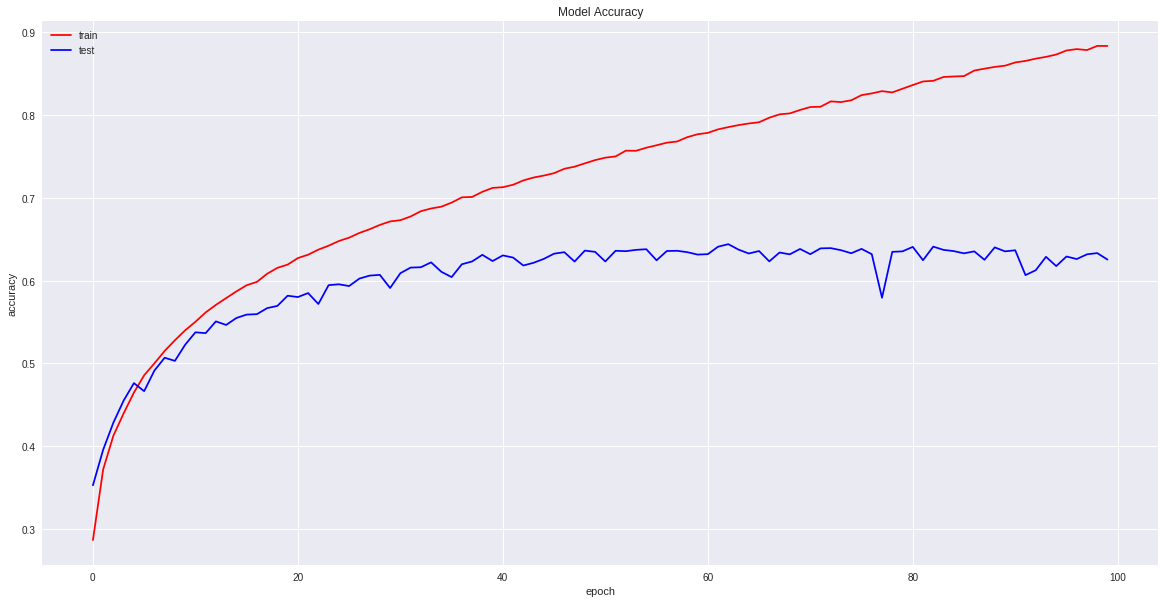

In [13]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1.history['acc'], color = 'r')
plt.plot(history_1.history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


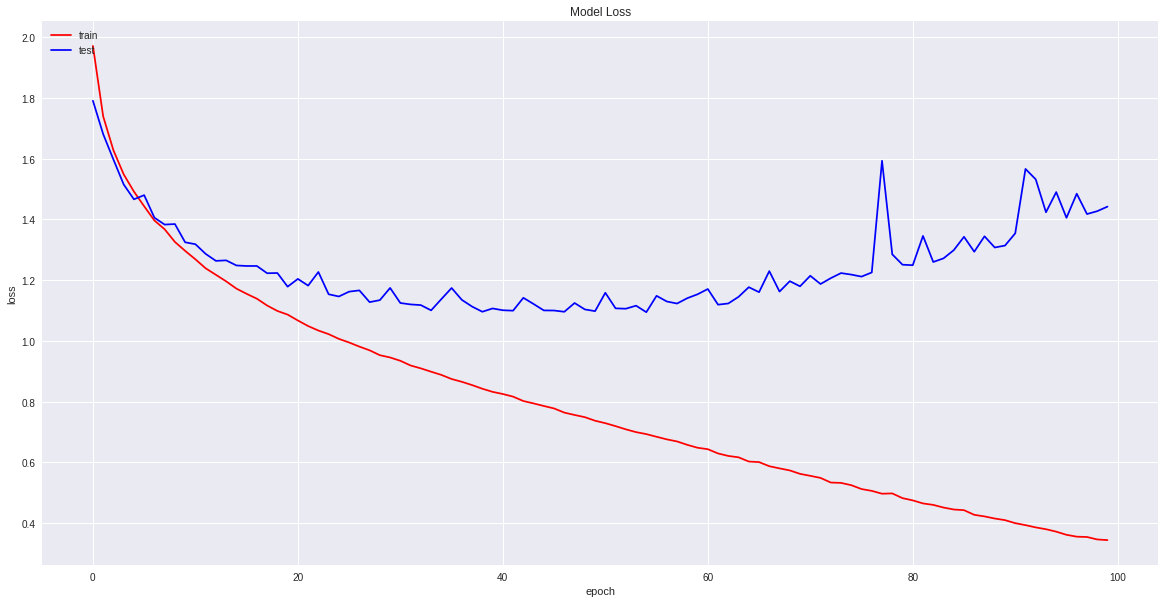

In [14]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'], color = 'r')
plt.plot(history_1.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()